# Capstone Project 2 : Public Transportation Transjakarta
by: Moh. Ali Fauzi

## A. Perkenalan

Transjakarta adalah mode transportasi berbasis Bus Rapid Transit (BRT) dan non-BRT yang sudah beroperasi sejak tahun 2004 di Jakarta. Transjakarta merupakan wujud dari pengelolaan transportasi publik di Jakarta yang terpadu dan bebas macet. Tidak hanya bertujuan untuk mengurai kemacetan, kemudahan akses Transjakarta sekaligus menjadikannya sebagai transportasi publik pilihan warga Jakarta.

Daftar tarif transjakarta:
- Rp 2.000 (Pukul 05.00 – 07.00 WIB)
- Rp 500 (Pukul 07.00 – 24.00 WIB)
- Rp 3.500 (Angkutan Malam Hari, Pukul 24.00 – 05.00 WIB)

Tidak hanya melayani perjalanan di dalam Kota Jakarta, Transjakarta kini sudah memiliki trayek hingga ke wilayah megapolitan Bodetabek (Bogor, Depok, Tangerang, dan Bekasi). Transjakarta memiliki jam operasional 24 Jam dengan jumlah 273 halte yang tersebar di 13 koridor. Jalur Transjakarta terbentang sepanjang 251.2km dan memiliki 260 halte yang tersebar di seluruh wilayah Jakarta dan sekitarnya.

Selain jalur khusus Transjakarta untuk layanan BRT (Bus Way), Transjakarta juga menggunakan jalur jalan biasa. Selain beberapa koridor dengan rute di atas, Transjakarta juga menyediakan rute tambahan di beberapa koridor.

(sumber: https://www.jakarta.go.id/transjakarta, https://transjakarta.co.id/, https://id.linkedin.com/company/pt.-transportasi-jakarta-transjakarta-)

## Latar Belakang

Sebuah perusahaan yang bergerak di bidang layanan transportasi, ingin merekrut *data scientist*. Perusahaan ini melakukan pendataan tentang pelanggan yang melakukan perjalanan transportasi dengan bus. Perusahaan ingin mengetahui karakteristik pelanggan mana yang menaiki transportasi bus.

## Pernyataan Masalah




Perusahaan ingin mengetahui **pelanggan mana saja yang memakai layanan transportasi publik transjakarta**. Informasi ini akan membantu perusahaan untuk mengetahui kalangan umur, lokasi ramai pengunjung dan lain-lain yang relevan.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik pelanggan yang memakai layanan transportasi publik transjakarta untuk mengetahui potensi paling tinggi serta jumlah penumpang yang padat untuk dijadikan tujuan dalam pengembangan transportasi, apakah diperlukannya penambahan armada atau tidak di jalur tertentu sehingga dapat mengoptimalkan pelayanan?**

## Tujuan Masalah

- Mengetahui potensi paling tinggi serta jumlah penumpang untuk mengetahui apakah diperlukan penambahan armada atau tidak di jalur tertentu untuk mengoptimalkan pelayanan?
- Mengetahui secara geografis, koridor mana yang sering banyak dikunjungi?
- Mengetahui kelompok umur mana saja yang menjadi penumpang bus transjakarta?

## Batasan Masalah

- Data hanya berisi informasi transaksi pelanggan dalam wilayah jakarta saja.
- Data hanya tersedia dalam 1 bulan saja yaitu April 2023.

## Stakeholder

- Para atasan di Perusahaan Transjakarta, sebagai bahan laporan untuk informasi kondisi pelayanan.
- Manager divisi data analis, sebagai bahan evaluasi.

## B. Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction).

Dataset ini berisi informasi tentang transaksi pelanggan yang memakai layanan bus transportasi publik. Ada 22 kolom di dalam dataset Transjakarta, yaitu:

1.	**transID** : Nomor ID transaksi unik untuk setiap transaksi pelanggan yang memakai layanan bus.
2.	**payCardID** : Nomor identifikasi kartu pelanggan sebagai pembayaran tiket masuk dan keluar bus.
3.	**payCardBank** : Nama atau metode pembayaran dari pelanggan.
4.	**payCardName** : Nama pelanggan yang tertera di kartu.
5.	**payCardSex** : Jenis kelamin pelanggan yang tertera di kartu.
6.	**payCardBirthDate** : Tanggal lahir pelanggan yang tertera di kartu.
7.	**corridorID** : Koridor ID / rute ID sebagai kunci untuk rute transportasi.
8.	**corridorName** : Nama koridor / nama rute yang berisi tempat start dan finish untuk setiap rute.
9.	**direction** : Kode perjalanan bus, 0 for pergi, 1 for pulang sebagai arah ke rute perjalanan.
10.	**tapInStops** : Nomor ID untuk tap in (masuk) untuk identifikasi nama pemberhentian bus saat pelanggan menekan tombol tap in dan masuk ke bus.
11.	**tapInStopsName** : Nama lokasi halte untuk pelanggan yang menekan tombol tap in dan masuk ke bus.
12.	**tapInStopsLat** : Koordinat latitude dari halte saat pelanggan masuk ke bus.
13.	**tapInStopsLon** : Koordinat longitude dari halte saat pelanggan masuk ke bus.
14.	**stopStartSeq** : Urutan pemberhentian saat bus pergi, yaitu pemberhentian pertama, pemberhentian kedua, dll yang berkaitan dengan arah.
15.	**tapInTime** : Waktu saat pelanggan menekan tombol tap in, berisi tanggal dan waktu.
16.	**tapOutStops** : Nomor ID untuk tap out (keluar) untuk identifikasi nama pemberhentian bus saat pelanggan menekan tombol tap out dan keluar dari bus.
17.	**tapOutStopsName** : Nama lokasi halte saat pelanggan menekan tombol tap out dan keluar ke bus.
18.	**tapOutStopsLat** : Koordinat latitude dari halte saat pelanggan menekan tombol Tap Out dan keluar dari bus.
19.	**tapOutStopsLon** : Koordinat longitude dari halte saat pelanggan menekan tombol Tap Out dan keluar dari bus.
20.	**stopEndSeq** : Urutan pemberhentian saat bus berhenti, yaitu pemberhentian pertama, pemberhentian kedua, dll yang berkaitan dengan arah.
21.	**tapOutTime** : Waktu saat pelanggan keluar dan menekan tombol tap out, berisi tanggal dan waktu.
22.	**payAmount** : Jumlah pembayaran pelanggan. Ada yang gratis dan berbayar.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [85]:
# 1.1 Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
# uji statistik
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
# Abaikan peringatan
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1.2 Mengecek data bagian atas
dfTransJkt = pd.read_csv("Transjakarta.csv")
dfTransJkt.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [3]:
# 1.3 Mengecek data bagian bawah
dfTransJkt.tail()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh informasi data dalam tahapan yang bernama pemahaman data *(data understanding)*. Dari proses ini, kita bisa mengetahui anomali-anomali (keanehan) apa saja yang terdapat di dalam dataset kita dan selanjutnya akan ditangani dalam tahapan pembersihan data *(data cleaning)*. Setiap penanganan anomali yang dilakukan, akan disertai dengan keputusan langkah yang diambil, baik secara pengetahuan domain *(domain knowledge)* maupun secara statistik.

Pertama-tama, mari kita lihat informasi dari dataset Transjakarta tahun 2023.

In [4]:
# 2.1 Melihat deskripsi data
print(f'Jumlah baris beserta kolom di dataset Transjakarta 2033 adalah: {dfTransJkt.shape}')
dfTransJkt.info()

Jumlah baris beserta kolom di dataset Transjakarta 2033 adalah: (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops

In [5]:
# 2.2 Membuat tabel baru berisi deskripsi
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in dfTransJkt.columns :
    listItem.append( [col, dfTransJkt[col].nunique(), dfTransJkt[col].unique()])

tabelTrans1 = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Kolom Unik', 'Kolom Unik'],
            data=listItem)
tabelTrans1

,Nama Kolom,Jumlah Kolom Unik,Kolom Unik
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris.
* terdapat 10 kolom, yaitu, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN (berlabel nan).
* kolom `transID`, `payCardID` berisikan id unik untuk pembayaran tiap pelanggan, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* Kolom `stopStartSeq` dan `stopEndSeq` memiliki tipe data yang berbeda, dimana kolom `stopEndSeq` mempunyai tipe data float, maka akan diubah menjadi tipe data integer setelah melakukan pembersihan data.

In [6]:
# 2.3 Mengecek nilai kosong
dfTransJkt.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [7]:
# 2.4 Membuat persentase dari nilai kosong pada tiap kolom
dfTransJkt.isna().sum()/dfTransJkt.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

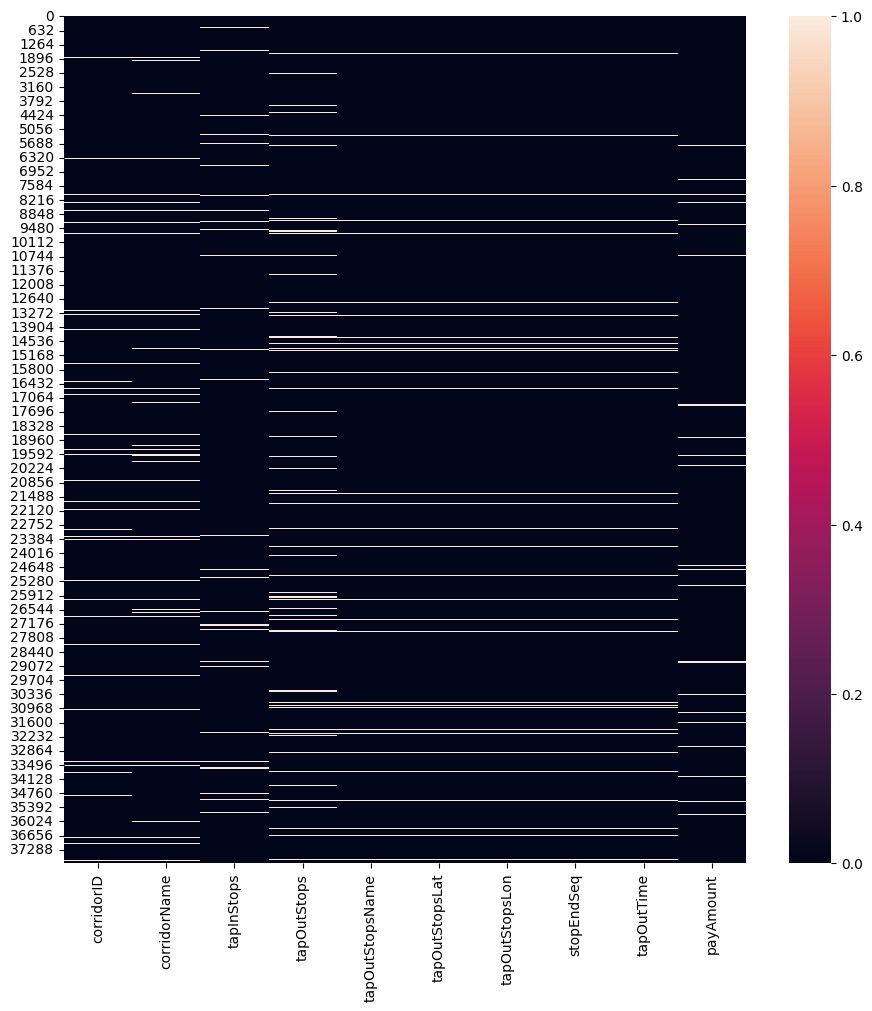

In [8]:
# 2.5 Membuat persebaran data kosong dalam heatmap
plt.figure(figsize= (11, 11))
sns.heatmap(dfTransJkt[
	['corridorID','corridorName','tapInStops',
  	'tapOutStops','tapOutStopsName','tapOutStopsLat',
  	'tapOutStopsLon','stopEndSeq', 'tapOutTime', 
  	'payAmount']
  ].isna())

plt.show()

Secara garis besar bisa dilihat bahwa:
* *missing value* di kolom `corridorName` dan `tapOutStops` memiliki proporsi yang relatif rendah (dibawah 10%), dengan missing value di kolom `corridorName` mencapai 5,09% dan 6,04%.
* *missing value* di kolom `corridorID`, `tapInStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `tapOutStops` memiliki proporsi yang sangat rendah (dibawah 5%), dengan missing value di kolom `payAmount` mencapai berkisar antara 2,65% sampai 3,54%.
* *missing value* di kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStopsName` kosong, maka kemungkinan besar data di `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` juga kosong.
* *missing value* di semua kolom kalau dibandingkan dengan data keseluruhan memiliki proporsi sekitar 34,44% atau sekitar 13.072 kolom dari total 37.900 kolom.

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan, karena meskipun jumlah missing value memiliki proporsi yang tergolong cukup kecil (dibawah 10%) pada setiap kolom, tapi pada saat perbandingan antara nilai kosong dengan nilai tidak kosong secara keseluruhan, nilai kosong tersebut berjumlah diatas 10%. Jadi kalau dihapus, ini akan mengurangi keaslian data.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Untuk saat ini, saya akan mengisi nilai data kosong menggunakan:
- nilai modus pada kolom `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `tapOutTime`, `stopEndSeq` `payAmount`.
Maka langkah yang saya lakukan adalah:

In [9]:
# 2.6 Mengisi data kosong
dfTransJkt.fillna({
	'corridorID': dfTransJkt['corridorID'].mode()[0],
	'corridorName': dfTransJkt['corridorID'].mode()[0],
	'tapInStops': dfTransJkt['corridorID'].mode()[0],
	'tapOutStops': dfTransJkt['corridorID'].mode()[0],
	'tapOutStopsName': dfTransJkt['corridorID'].mode()[0],
	'tapOutStopsLat': dfTransJkt['corridorID'].mode()[0],
	'tapOutStopsLon': dfTransJkt['corridorID'].mode()[0],
	'tapOutTime': dfTransJkt['corridorID'].mode()[0],
	'stopEndSeq': dfTransJkt['corridorID'].mode()[0],
	'payAmount': dfTransJkt['corridorID'].mode()[0]
}, inplace= True)

# [['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutTime']].replace([np.nan], 
# dfTransJkt[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutTime']].mode()[0], inplace=True)

# dfNew = dfTransJkt.dropna()
# string_columns = df.select_dtypes(include=['object']).columns
# df[string_columns] = df[string_columns].fillna(df[string_columns].mode().iloc[0])
# print(df)

In [10]:
# 2.7 Cek lagi apakah ada Data Kosong
dfTransJkt.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [11]:
# 2.3a Mengubah data integer ke object
dfTransJkt.dtypes

transID             object 
payCardID           int64  
payCardBank         object 
payCardName         object 
payCardSex          object 
payCardBirthDate    int64  
corridorID          object 
corridorName        object 
direction           float64
tapInStops          object 
tapInStopsName      object 
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq        int64  
tapInTime           object 
tapOutStops         object 
tapOutStopsName     object 
tapOutStopsLat      object 
tapOutStopsLon      object 
stopEndSeq          object 
tapOutTime          object 
payAmount           object 
dtype: object

In [12]:
# 2.3b Mengubah kolom stopStartSeq ke tipe object
dfTransJkt['stopStartSeq'] = dfTransJkt['stopStartSeq'].astype('object')

In [13]:
# 2.3c Mengecek lagi tipe data
dfTransJkt.dtypes

transID             object 
payCardID           int64  
payCardBank         object 
payCardName         object 
payCardSex          object 
payCardBirthDate    int64  
corridorID          object 
corridorName        object 
direction           float64
tapInStops          object 
tapInStopsName      object 
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq        object 
tapInTime           object 
tapOutStops         object 
tapOutStopsName     object 
tapOutStopsLat      object 
tapOutStopsLon      object 
stopEndSeq          object 
tapOutTime          object 
payAmount           object 
dtype: object

Disini didapat bahwa tidak ada data duplikat. Maka selanjutnya akan disimpan ke file baru yang bertipe csv

Setelah data dibersihkan, baru disimpan ke file baru

In [17]:
# 2.10 Menyimpan file baru ke csv
dfTransJkt.to_csv("TransjakartaCleaning.csv")

## C. Analisis Data

Analisa yang akan saya lakukan adalah:
- Membuat kolom baru bernama umur dari kolom `payCardBirthDate` untuk mengetahui persebaran data pelanggan berdasarkan usia 

In [14]:
# 3.1 Cek kolom payCardBirthDate
dfTransJkt['payCardBirthDate']

0        2008
1        1997
2        1992
3        1978
4        1982
         ... 
37895    2004
37896    1974
37897    1976
37898    1976
37899    1985
Name: payCardBirthDate, Length: 37900, dtype: int64

In [21]:
# 3.2a Ubah kolom menjadi tipe datetime
from datetime import datetime, time
# dfTransJkt['newpayCardBirthDate'] = pd.to_datetime(dfTransJkt['payCardBirthDate'], errors = 'coerce')

In [26]:
# 3.2b Buat variabel bernama now untuk memuat informasi tahun sekarang
now = datetime.now().year
dfTransJkt['age'] = now - dfTransJkt['payCardBirthDate']

In [28]:
# 3.2c cek kolom umur
display(dfTransJkt['payCardBirthDate'], dfTransJkt['age'])
# dfTransJkt['age']

0        2008
1        1997
2        1992
3        1978
4        1982
         ... 
37895    2004
37896    1974
37897    1976
37898    1976
37899    1985
Name: payCardBirthDate, Length: 37900, dtype: int64

0        16
1        27
2        32
3        46
4        42
         ..
37895    20
37896    50
37897    48
37898    48
37899    39
Name: age, Length: 37900, dtype: int64

In [29]:
# 3.4 Melihat koridor mana yang sering dikunjungi
dfTransJkt['corridorName'].value_counts()

corridorName
1T                                                1930
Cibubur - Balai Kota                              391 
Ciputat - CSW                                     383 
Pulo Gadung - Monas                               343 
Harmoni - Jakarta International Stadium           338 
                                                 ...  
Senen - Tanah Abang                               41  
Gondangdia - Balai Kota                           40  
Term. Pulo Gadung - Lampiri                       31  
Tanah Abang - Kebayoran Lama via Pos Pengumben    23  
Kampung Rambutan - Blok M                         17  
Name: count, Length: 217, dtype: int64

Dari di atas, didapat bahwa koridor 1T merupakan koridor yang sering dikunjungi dengan 1930 transaksi di tahun 2023, diikuti dengan Cibubur - Balai Kota dengan 391 transaksi, serta Ciputat - CSW dengan 383 transaksi. Sehingga kita akan memilih 3 koridor teratas ini untuk dilakukan analisa lebih lanjut.

In [38]:
# 3.6 Melihat data transaksi berdasarkan koridor bernama 1T saja
dfCor1T = dfTransJkt[dfTransJkt['corridorName'] == '1T']
dfCor1T

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,1T,1T,1.0,B03416P,...,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.784,12.0,2023-04-03 07:11:43,0.0,33
38,RLLZ887W3V14WZ,4947438345710982,dki,Rahayu Rahayu,F,2006,5M,1T,1.0,B02994P,...,16,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0,18
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,1T,0.0,P00202,...,9,2023-04-03 05:28:22,P00137,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0,38
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,1T,1.0,B00589P,...,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0,13
61,TWAK265Z0M88QR,213155263532652,emoney,Restu Waluyo,F,1984,12A,1T,0.0,B05324P,...,9,2023-04-03 06:13:03,P00138,Museum Fatahillah,-6.13393,106.81209,18.0,2023-04-03 06:50:23,3500.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37792,HTYN200W0M88AC,4237219123070834,dki,Luwar Sihombing,M,2008,S31,1T,1.0,B01184P,...,2,2023-04-26 15:41:39,B03177P,RS Siloam,-6.292071,106.78467,3.0,2023-04-26 16:45:16,20000.0,16
37815,OSYS465Q5O68VD,3534140838249087,dki,Saka Pradipta,M,2009,JAK.56,1T,1.0,B04394P,...,45,2023-04-15 18:26:35,B05498P,St. Pesing,-6.161726,106.77127,52.0,2023-04-15 21:01:27,0.0,15
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,1T,1.0,B01094P,...,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0,32
37838,GTLM961T1U29JA,4204405669287580,dki,"Saka Wijaya, S.H.",M,1995,1T,1T,1.0,B03520P,...,12,2023-04-28 12:30:26,B04078P,Sbr. Masjid Pasmar Marunda,-6.115928,106.95189,64.0,2023-04-28 13:59:57,0.0,29


Dari sini, saya akan mencoba melihat persebaran data pada kategori umur untuk mengetahui pelanggan berumur mana saja yang menggunakan layanan Transjakarta. Koridor yang saya analisis adalah:
- Semua koridor secara keseluruhan
- Koridor 1T
- Koridor Cibubur - Balai Kota
- Koridor Ciputat - CSW

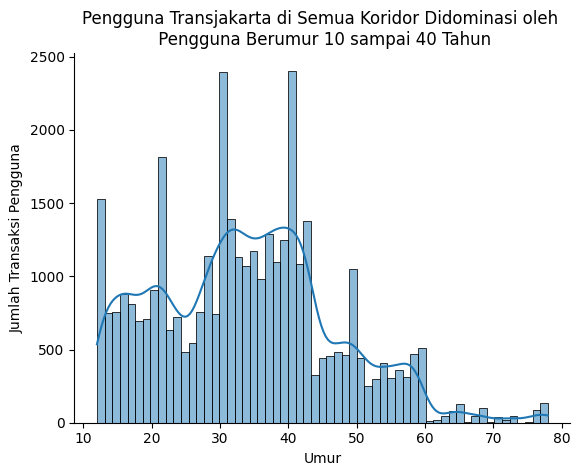

In [65]:
# 3.7 Melihat persebaran transaksi untuk semua koridor berdasarkan umur
sns.histplot(data= dfTransJkt, x= dfTransJkt['age'], kde= True)
plt.title('Pengguna Transjakarta di Semua Koridor Didominasi oleh \n Pengguna Berumur 10 sampai 40 Tahun')
plt.xlabel ('Umur')
plt.ylabel ('Jumlah Transaksi Pengguna')
# menghapus garis axis atas dan kanan
plt.rcParams ['axes.spines.top'] = False
plt.rcParams ['axes.spines.right'] = False
plt.show()

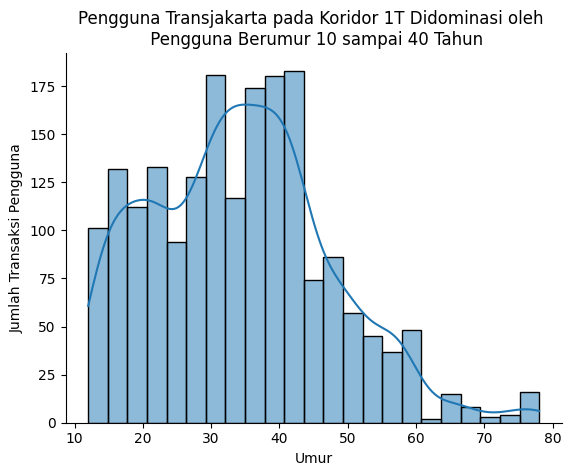

In [64]:
# 3.8 Kalau melihat dari kalangan umur pada koridor 1T saja
sns.histplot(data= dfCor1T, x= dfCor1T['age'], kde= True)
plt.title ('Pengguna Transjakarta pada Koridor 1T Didominasi oleh \n Pengguna Berumur 10 sampai 40 Tahun')
plt.xlabel ('Umur')
plt.ylabel ('Jumlah Transaksi Pengguna')
# # hapus garis beserta duri-duri (spines) dari axis label atas dan kanan

# for spine in plt.gca().spines.values():
	# spine.set_visible(False)	
# plt.tick_params (top= 'off', bottom= 'on', left= 'on', right= 'off', labelleft= 'on', labelbottom= 'on')
plt.rcParams ['axes.spines.top'] = False
plt.rcParams ['axes.spines.right'] = False
plt.show()

In [40]:
# 3.9 Melihat transaksi berdasarkan koridor Cibubur - Balai Kota saja
dfCorCibubur = dfTransJkt[dfTransJkt['corridorName'] == 'Cibubur - Balai Kota']
dfCorCibubur

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,31
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,7,2023-04-03 05:57:55,1T,1T,1T,1T,1T,1T,20000.0,43
134,ESJQ990H8Q22LV,345711968178505,emoney,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,1.0,B00102P,...,0,2023-04-03 05:28:11,B00360P,Flyover Karet 2,-6.214808,106.81847,11.0,2023-04-03 06:09:57,20000.0,15
305,ELVF454E9T40AX,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,1.0,B00325P,...,7,2023-04-03 16:15:42,B02873P,Plaza Sentral,-6.216247,106.81676,12.0,2023-04-03 17:08:45,20000.0,31
370,BXVS080I7X46TX,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,1.0,B05773P,...,6,2023-04-03 17:54:25,B00325P,Dukuh Atas 3,-6.20565,106.8225,7.0,2023-04-03 19:39:59,20000.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33697,TPAD275S9L47PO,4501839580844956,dki,Cindy Salahudin,M,1978,1T,Cibubur - Balai Kota,0.0,B00694P,...,6,2023-04-22 05:20:41,B02420P,Menara Thamrin,-6.185275,106.82291,13.0,2023-04-22 07:03:03,20000.0,46
33908,UCFC924P2I45WZ,4800273826652460,dki,Rahayu Winarsih,F,1988,1T,Cibubur - Balai Kota,1.0,B02873P,...,12,2023-04-23 06:27:43,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-23 07:50:01,20000.0,36
34354,MYJJ824L9L59SU,5539337945664584,dki,"Vega Suryono, M.Ak",F,2008,1T,Cibubur - Balai Kota,0.0,B02863P,...,11,2023-04-30 11:50:29,B00113P,Bank Indonesia 2,-6.182667,106.82275,14.0,2023-04-30 12:15:08,20000.0,16
34440,IVEJ322X2Z13YE,4315872976588851570,brizzi,Rahmi Novitasari,F,1981,1T,Cibubur - Balai Kota,0.0,B03314P,...,12,2023-04-29 05:57:17,B00102P,Balai Kota 1,-6.180598,106.82847,16.0,2023-04-29 06:26:55,20000.0,43


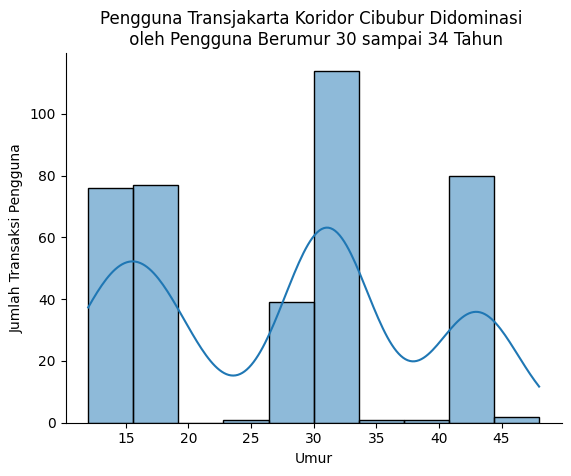

In [68]:
# 3.10 Melihat grafik persebaran dari kalangan umur pada koridor Cibubur - Balai Kota saja
sns.histplot(data= dfCorCibubur, x= dfCorCibubur['age'], kde= True)
plt.title('Pengguna Transjakarta Koridor Cibubur Didominasi \n oleh Pengguna Berumur 30 sampai 34 Tahun')
plt.xlabel ('Umur')
plt.ylabel ('Jumlah Transaksi Pengguna')
# hapus garis beserta duri-duri (spines) dari axis label atas dan kanan
plt.rcParams ['axes.spines.top'] = False
plt.rcParams ['axes.spines.right'] = False
plt.show()

In [42]:
# 3.11 Melihat transaksi berdasarkan koridor Ciputat - CSW saja
dfCorCiputat = dfTransJkt[dfTransJkt['corridorName'] == 'Ciputat - CSW']
dfCorCiputat

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
208,RGMW432Q3X94EA,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,0.0,B05904P,...,24,2023-04-03 06:04:00,B00053P,Antena II,-6.25033,106.79163,26.0,2023-04-03 06:57:30,3500.0,14
508,ASQJ814J6M20QW,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,1.0,B05232P,...,19,2023-04-03 17:23:45,B02919P,Pom Bensin Ciputat,-6.321313,106.74627,27.0,2023-04-03 18:39:40,3500.0,14
808,PQGD277L5K97CJ,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,0.0,B05904P,...,24,2023-04-04 05:24:47,B00053P,Antena II,-6.25033,106.79163,26.0,2023-04-04 05:59:02,3500.0,14
1108,AHTM837M1Y76ZB,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,1.0,B05232P,...,19,2023-04-04 17:18:52,B02919P,Pom Bensin Ciputat,-6.321313,106.74627,27.0,2023-04-04 19:10:01,3500.0,14
1408,YGKY836X5C90FA,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,0.0,B05904P,...,24,2023-04-05 06:20:32,1T,1T,1T,1T,1T,1T,3500.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37209,QIDD034U5N65AT,30049505347485,bni,"Ophelia Kuswoyo, S.Farm",M,1983,S21,Ciputat - CSW,0.0,B05904P,...,24,2023-04-19 05:21:31,B02161P,LPP RRI 1,-6.252131,106.7913,25.0,2023-04-19 06:42:13,3500.0,41
37409,HMAD803R7X79CJ,30049505347485,bni,"Ophelia Kuswoyo, S.Farm",M,1983,S21,Ciputat - CSW,1.0,B01304P,...,6,2023-04-19 19:42:52,B05821P,UMJ 2,-6.295705,106.76554,17.0,2023-04-19 21:26:12,3500.0,41
37679,RCZV713P0N65YK,213164568637687,emoney,R.M. Legawa Prastuti,F,1968,S21,Ciputat - CSW,1.0,B00052P,...,4,2023-04-02 09:00:50,B02068P,Komplek Uin,-6.308924,106.75601,23.0,2023-04-02 10:26:47,3500.0,56
37705,UVUL846G2G99AT,3520704464952524,dki,Hilda Halim,M,1986,S21,Ciputat - CSW,1.0,B05485P,...,1,2023-04-28 12:45:22,B02068P,Komplek Uin,-6.308924,106.75601,23.0,2023-04-28 14:53:48,3500.0,38


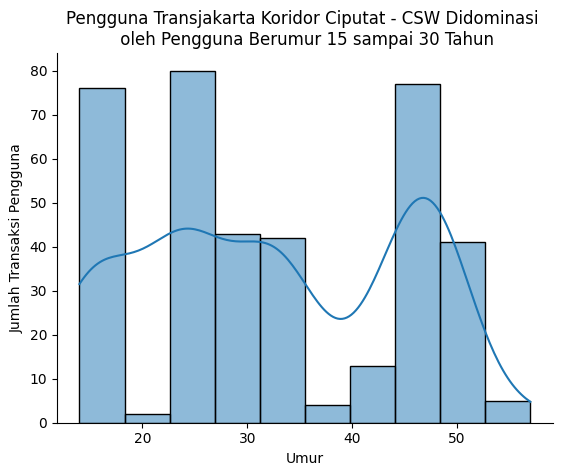

In [70]:
# 3.12 Melihat grafik persebaran dari kalangan umur pada koridor Ciputat - CSW saja
sns.histplot(data= dfCorCiputat, x= dfCorCiputat['age'], kde= True)
plt.title('Pengguna Transjakarta Koridor Ciputat - CSW Didominasi \n oleh Pengguna Berumur 15 sampai 30 Tahun')
plt.xlabel ('Umur')
plt.ylabel ('Jumlah Transaksi Pengguna')

# hapus garis beserta duri-duri (spines) dari axis label atas dan kanan
plt.rcParams ['axes.spines.top'] = False
plt.rcParams ['axes.spines.right'] = False

plt.show()

Setelah mengetahui persebaran pengguna berdasarkan umur, maka selanjutnya adalah menguji secara statistik untuk mengetahui apakah ada perbedaan yang signifikan antara kepadatan (jumlah) transaksi pengguna Transjakarta pada koidor Cibubur dan Ciputat dengan menggunakan uji statistik Man-Whitney. Karena dari grafik histogram diatas, didapatkan bahwa data berdistribusi tidak normal.

### Uji Mann Whitney

1. Hipotesis
- H0 : Tidak ada perbedaan signifikan antara pengguna layanan Transjakarta pada koridor 1T, Cibubur dan Ciputat. 
- H1 : Terdapat perbedaan signifikan antara pengguna layanan Transjakarta pada koridor 1T, Cibubur dan Ciputat.
2. Tingkat Signifikansi
alpha atau α = 5% = 0.05
3. Daerah Kritis
Tolak H0 jika P-value < α

In [87]:
# 4.1 uji kruskal-Wallis untuk 3 kelompok data kolom umur yang tidak berdistribusi normal (non parametrik)
from scipy import stats

grup1T = dfCor1T['age']
grupCibubur = dfCorCibubur['age']
grupCiputat = dfCorCiputat['age']

# masukkan hasil ke variabel result
result = stats.kruskal(grup1T, grupCibubur, grupCiputat)
print(result)

KruskalResult(statistic=80.69501531581264, pvalue=3.0012354362691638e-18)


Hasil menunjukkan bahwa nilai statistik dari hasil uji Kruskal-Wallis yaitu 80.695 dan nilai p yang sesuai adalah 3.001 x e-19. Karena nilai p dibawah 0.05, maka kita punya bukti kuat untuk menolak Hipotesis nol (H0) yang menyatakan bahwa ada perbedaan signifikan antara ketiga kelompok yaitu koridor 1T, koridor Cibubur, dan koridor Ciputat.

In [91]:
# 4.2 uji kruskal-wallis untuk melihat 2 kelompok umur
result2, pvalue2 = stats.kruskal(grupCibubur, grupCiputat)
print(f'KruskalResult(statistic={result2}, pvalue={pvalue2})')

KruskalResult(statistic=35.8244311445112, pvalue=2.1592320455281913e-09)


In [93]:
# 4.3 Mencari tahu apakah perlu ditambah armada pada koridor cibubur dan ciputat untuk menyamakan transaksi agar sama banyak dengan koridor 1T
if pvalue2 > 0.05:
  print(f'P-Value: {pvalue2}, Dibutuhkan penambahan armada pada koridor Cibubur dan Ciputat')
else:
  print(f'P-Value: {pvalue2}, Tidak dibutuhkan penambahan armada pada koridor Cibubur dan Ciputat')

P-Value: 2.1592320455281913e-09, Tidak dibutuhkan penambahan armada pada koridor Cibubur dan Ciputat


4. Statistik Hasil Uji
p-value = 2.1592320455281913e-09
α = 0,05
Sehingga p-value (2.1592320455281913e-09) < (0,05)
5. Keputusan
Karena nilai p-value (0.6991341991341992) < (0,05) maka keputusannya adalah gagal tolak H0.

Berdasarkan hasil ini, dapat menyimpulkan bahwa tidak ada perbedaan yang signifikan antara jumlah transaksi penumpang pada koridor 1T, Cibubur dan Ciputat.

## D. Kesimpulan

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang pengguna Transjakarta:
1. Koridor 1T merupakan koridor yang paling banyak dikunjungi dengan 1930 transaksi, lalu diikuti dengan koridor Cibubur dan Ciputat selama bulan April di tahun 2023.
2. Nilai statistik sebesar 80.695 merujuk pada nilai statistik dalam uji Kruskal-Wallis, dan nilai p-value adalah nilai probabilitas yang menunjukkan signifikansi statistik dari perbedaan antara ketiga kelompok. Dalam kasus ini, nilai p-value adalah 2.159e-09, maka tingkat signifikansi sebesar 2.159e-09 lebih kecil dari 0.05, maka ada cukup bukti untuk menerima hipotesis nol, yang berarti tidak ada perbedaan yang signifikan antara ketiga kelompok dalam hal jumlah transaksi pelanggan.

## E. Rekomendasi

1. Dalam hasil Uji Kruskal-Wallis, nilai p-value adalah 2.159e-09 yaitu gagal tolak H0 maka tidak dibutuhkan penambahan armada pada trayek koridor Cibubur dan Ciputat. Akan tetapi jika ingin menaikkan profit agar koridor Cibubur dan Ciputat menyamai profit koridor 1T, maka perlu diberi promosi.
2. Belum bisa memberikan rekomendasi lebih mendalam, karena analisis berdasarkan top 3 koridor name dan umur belum cukup untuk menjawab pertanyaan-pertanyaan pada pertanyaan masalah. Maka dari itu, seharusnya dilakukan analisis secara mendalam.